# Dependence on dimension

In [1]:
from kd_ub import kd_traj
import numpy as np
import matplotlib.pyplot as plt

# Quadratic

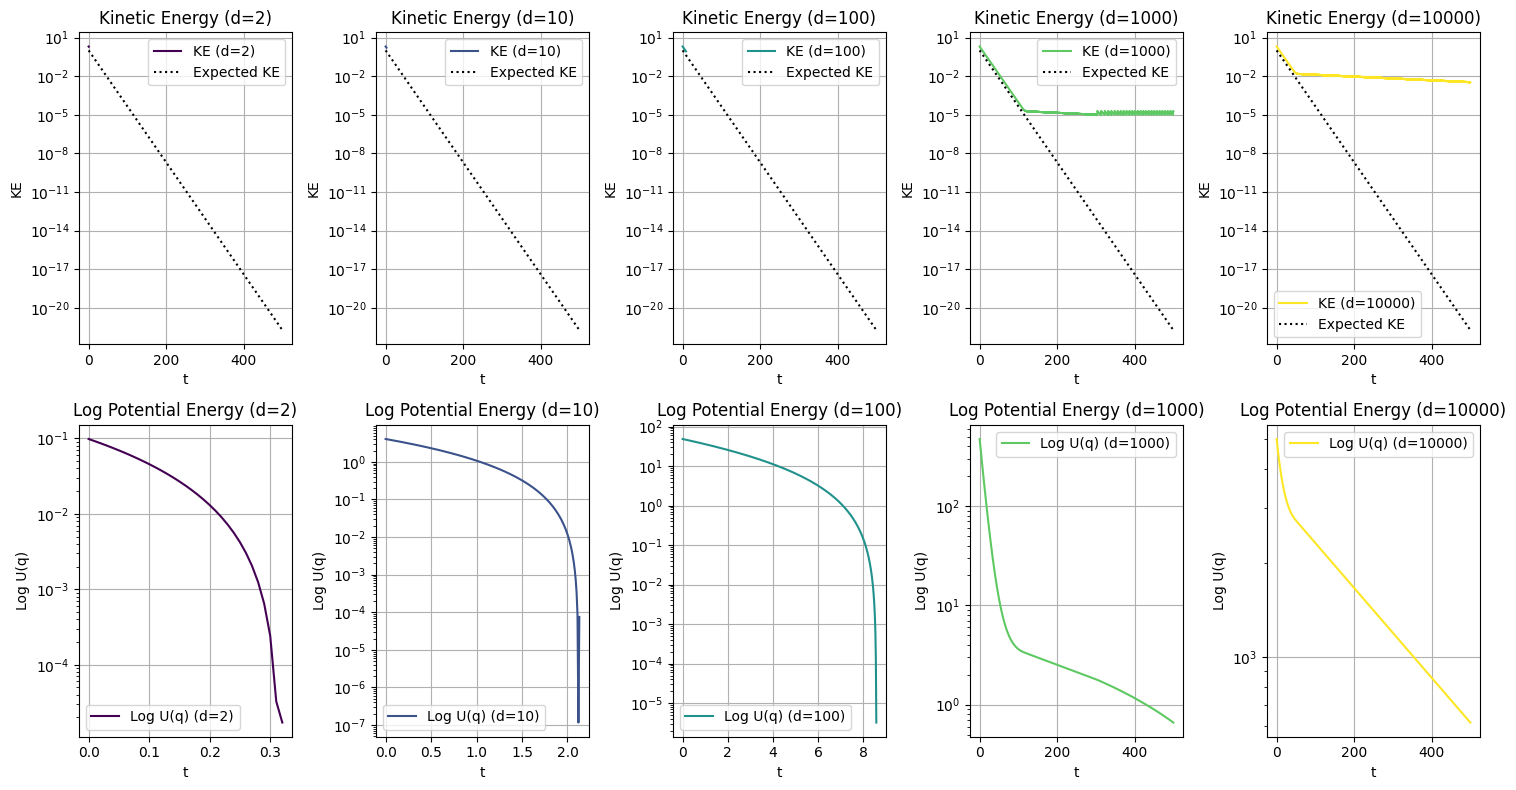

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from kd_ub import kd_traj  # Import kinetic descent function

# Define Parameters
Pars = {}
Pars['gamma'] = 0.1  # Friction term
c0 = 1  # Initial kinetic energy

# Define decay function for kinetic energy
decay_exp = {
    'c': lambda t, P: c0 * np.exp(-P['gamma'] * t),
    'cp': lambda t, P: -P['gamma'] * c0 * np.exp(-P['gamma'] * t),
    'csqrt': lambda t, P: np.sqrt(c0 * np.exp(-P['gamma'] * t))
}
Pars['decay'] = decay_exp

# Function to define quadratic potential and force with identity matrix (A=I)
def identity_potential(d):
    U = lambda x, P: 0.5 * np.dot(x, x)  # Identity potential (U = 0.5 * ||x||^2)
    F = lambda x, P: -x  # Force (F = -x)
    return U, F

# Experiment settings
dims = [2, 10, 100, 1000, 10000]  # Different dimensions to test
h = 0.01  # Step size
Ns = 50000  # Number of iterations

# Plot setup
fig, axs = plt.subplots(2, len(dims), figsize=(15, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(dims)))

# Loop over different dimensions
for i, d in enumerate(dims):
    U, F = identity_potential(d)
    Model = {'U': U, 'F': F}
    
    # Initial conditions
    q0 = np.random.randn(d)  # Random start point
    p0 = F(q0, Pars)  # Initial momentum
    p0 = (p0 / np.linalg.norm(p0)) * np.sqrt(2 * c0)  # Normalize momentum

    # Run kinetic descent
    T, Q, P, KE, PE = kd_traj(q0, p0, h, Ns, Pars, Model, tol=1e-5)

    # Plot kinetic energy
    axs[0, i].semilogy(T, KE, label=f'KE (d={d})', color=colors[i])
    axs[0, i].semilogy(T, np.exp(-Pars['gamma'] * T), label='Expected KE', linestyle='dotted', color='black')
    axs[0, i].set_title(f'Kinetic Energy (d={d})')
    axs[0, i].set_xlabel('t')
    axs[0, i].set_ylabel('KE')
    axs[0, i].legend()
    axs[0, i].grid(True)

    # Plot log potential energy
    axs[1, i].semilogy(T, PE, label=f'Log U(q) (d={d})', color=colors[i])
    axs[1, i].set_title(f'Log Potential Energy (d={d})')
    axs[1, i].set_xlabel('t')
    axs[1, i].set_ylabel('Log U(q)')
    axs[1, i].legend()
    axs[1, i].grid(True)

plt.tight_layout()
plt.show()


# Scaling KE with dimension

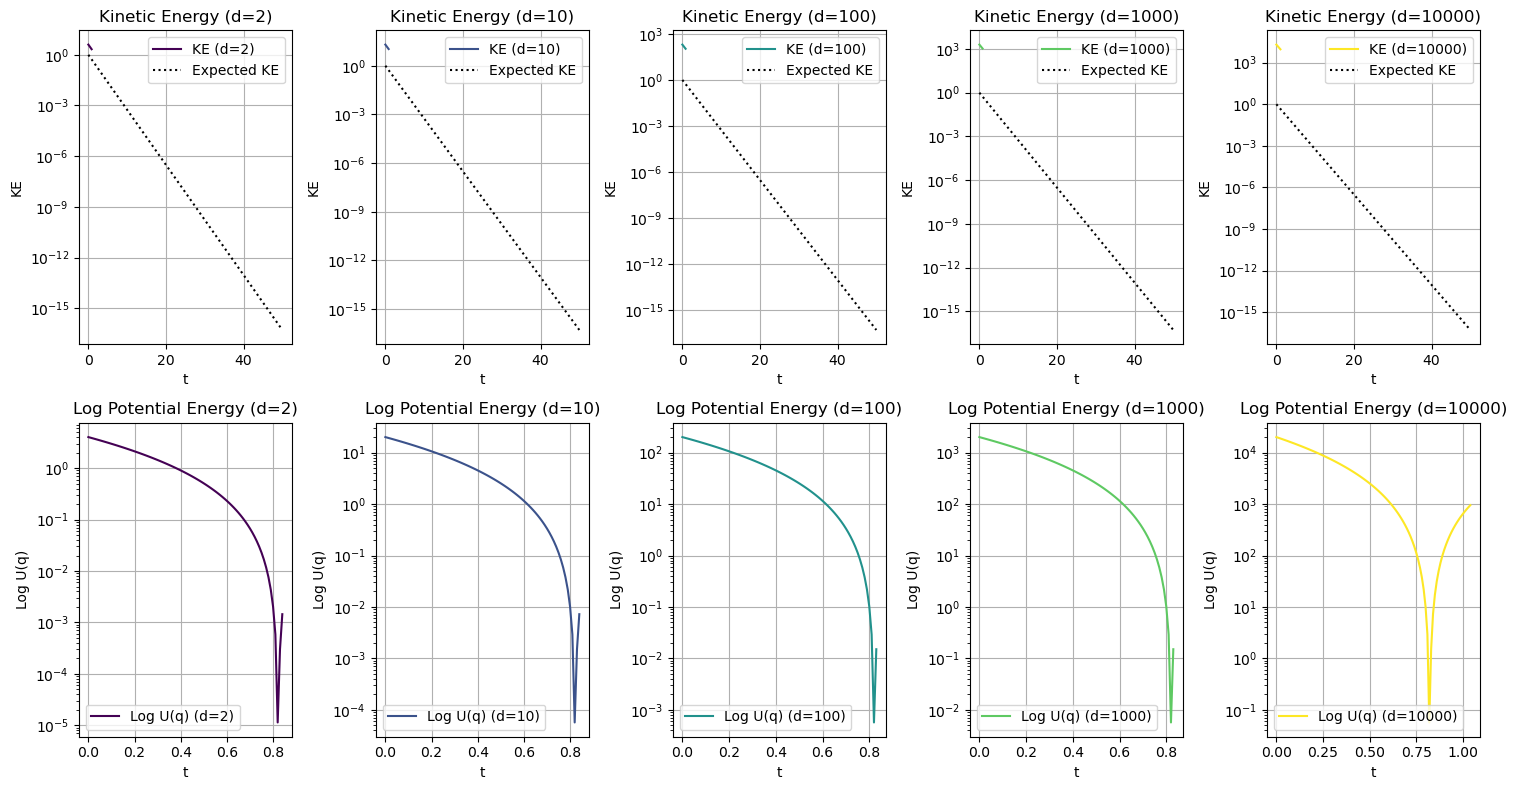

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from kd_ub import kd_traj

# Define Parameters
Pars = {}
Pars['gamma'] = 0.75
Pars['beta'] = 0.9

def scale_c0(d):
    return d  # Scale c0 with dimension

# Define decay function for kinetic energy
decay_exp = {
    'c': lambda t, P: scale_c0(P['d']) * np.exp(-P['gamma'] * t),
    'cp': lambda t, P: -P['gamma'] * scale_c0(P['d']) * np.exp(-P['gamma'] * t),
    'csqrt': lambda t, P: np.sqrt(scale_c0(P['d']) * np.exp(-P['gamma'] * t))
}
Pars['decay'] = decay_exp

# Function to define quadratic potential and force with identity matrix (A=I)
def identity_potential(d):
    U = lambda x, P: 0.5 * np.dot(x, x)  # Identity potential (U = 0.5 * ||x||^2)
    F = lambda x, P: -x  # Force (F = -x)
    return U, F

# Experiment settings
dims = [2, 10, 100, 1000, 10000]  # Different dimensions to test
h = 0.01  # Step size
Ns = 5000  # Number of iterations

# Plot setup
fig, axs = plt.subplots(2, len(dims), figsize=(15, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(dims)))

# Loop over different dimensions
for i, d in enumerate(dims):
    Pars['d'] = d
    c0 = scale_c0(Pars['d'])  # Scale c0 with dimension
    U, F = identity_potential(d)
    Model = {'U': U, 'F': F}
    
    # Initial conditions
    q0 = 2 * np.ones(d)  # Random start point
    p0 = F(q0, Pars)  # Initial momentum
    p0 = (p0 / np.linalg.norm(p0)) * np.sqrt(2 * c0)  # Normalize momentum

    # Run kinetic descent
    T, Q, P, KE, PE = kd_traj(q0, p0, h, Ns, Pars, Model, tol=1e-5)

    # Plot kinetic energy
    axs[0, i].semilogy(T, KE, label=f'KE (d={d})', color=colors[i])
    axs[0, i].semilogy(T, np.exp(-Pars['gamma'] * T), label='Expected KE', linestyle='dotted', color='black')
    axs[0, i].set_title(f'Kinetic Energy (d={d})')
    axs[0, i].set_xlabel('t')
    axs[0, i].set_ylabel('KE')
    axs[0, i].legend()
    axs[0, i].grid(True)

    # Plot log potential energy
    axs[1, i].semilogy(T, PE, label=f'Log U(q) (d={d})', color=colors[i])
    axs[1, i].set_title(f'Log Potential Energy (d={d})')
    axs[1, i].set_xlabel('t')
    axs[1, i].set_ylabel('Log U(q)')
    axs[1, i].legend()
    axs[1, i].grid(True)

plt.tight_layout()
plt.show()

plt.show()

# Graph minimum against d